In [15]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


In [16]:
#PCG_iterations_jacobi = pd.read_csv('data/PCG_jacobi_20_iterations.csv', header=0, sep=',', names=['time' , 'residue' , 'iterations'], 
#                        usecols=['time', 'residue','iterations'], dtype=np.float64)
#CG_iterations = pd.read_csv('data/CG_128_iteration_20_timesteps.csv', header=0, sep=',', names=['time' , 'residue' , 'iterations'], 
#                        usecols=['time', 'residue', 'iterations'], dtype=np.float64)
#PCG_iterations_chebyshev = pd.read_csv('data/PCG_chebyshev_degree_31.csv', header=0, sep=',', names=['time' , 'residue' , 'iterations'], 
#                        usecols=['time', 'residue', 'iterations'], dtype=np.float64)
#PCG_iterations_newton = pd.read_csv('data/PCG_newton_level_5.csv', header=0, sep=',', names=['time' , 'residue' , 'iterations'], 
#                        usecols=['time', 'residue', 'iterations'], dtype=np.float64)
#chebyshev_landau = pd.read_csv('data/Chebyshev_FieldLandau.csv', header=0, sep=' ', names=['time', 'Ex field energy', 'Ex max norm'], 
#                        usecols=['time', 'Ex field energy'], dtype=np.float64)
landau = pd.read_csv('Landau.csv',header=0, sep=' ',names=['time', 'Ex field energy', 'Ex max norm'], 
                    usecols=['time', 'Ex field energy', 'Ex max norm'], dtype=np.float64)
γ=-0.3066
E_exact = 5.5*np.exp(γ*landau.get('time'))

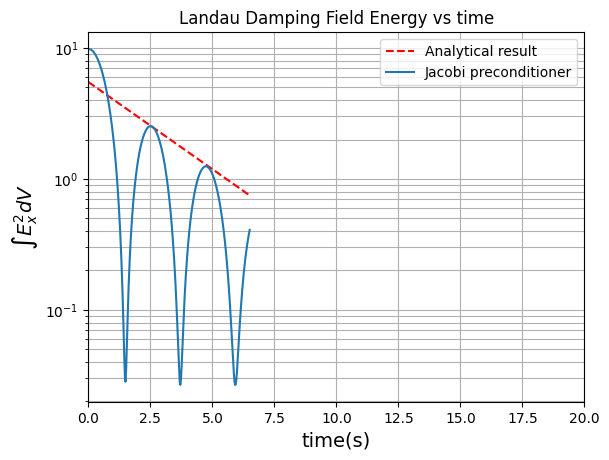

In [17]:
plt.plot(np.array(landau.get('time')), np.array(E_exact), 'r--', label='Analytical result')
plt.plot(np.array(landau.get('time')), np.array(landau.get('Ex field energy')), label='Jacobi preconditioner')

plt.title("Landau Damping Field Energy vs time")
plt.yscale('log')
plt.ylabel(r'$\int{E^2_{x}}dV$', fontsize=14)
plt.xlim(0,20)
#plt.ylim(0.001, 20)
plt.xlabel('time(s)', fontsize=14)
plt.grid('True', which='both')
plt.legend()

plt.savefig('WeakLandauDamping_PCG.pdf')

In [12]:
plt.plot(np.array(PCG_iterations_jacobi.get('time')), np.array(PCG_iterations_jacobi.get('iterations')), 'r--',marker='*', label='Diagonal preconditioner')
plt.plot(np.array(PCG_iterations_newton.get('time')), np.array(PCG_iterations_newton.get('iterations')), 'g--',marker='*', label='Newton (level = 5)')
plt.plot(np.array(PCG_iterations_chebyshev.get('time')), np.array(PCG_iterations_chebyshev.get('iterations')), 'y--',marker='*', label='Chebyshev (degree = 31)')
plt.plot(np.array(CG_iterations.get('time')), np.array(CG_iterations.get('iterations')), 'b.', marker='*', label='No preconditioner')

plt.title("Landau Damping (128 ,128 ,128) for 20 timesteps")
plt.ylabel("Iterations", fontsize=14)
plt.ylim(10, 500)
plt.xlabel('time [s]', fontsize=14)
plt.grid('True', which='both')
plt.legend()

plt.savefig('Landau_Damping_Iterations_vs_time.pdf')

NameError: name 'PCG_iterations_jacobi' is not defined

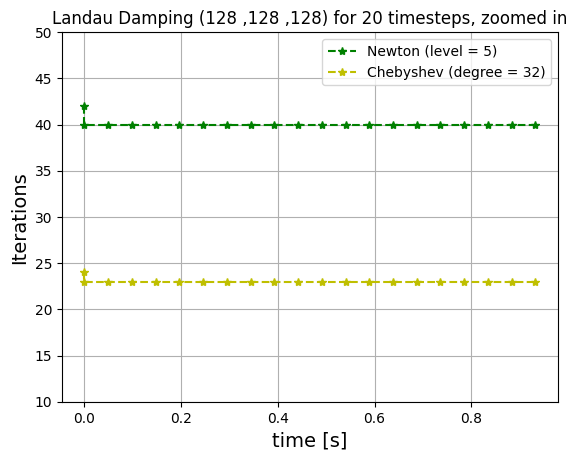

In [43]:

plt.plot(np.array(PCG_iterations_newton.get('time')), np.array(PCG_iterations_newton.get('iterations')), 'g--',marker='*', label='Newton (level = 5)')
plt.plot(np.array(PCG_iterations_chebyshev.get('time')), np.array(PCG_iterations_chebyshev.get('iterations')), 'y--',marker='*', label='Chebyshev (degree = 32)')

plt.title("Landau Damping (128 ,128 ,128) for 20 timesteps, zoomed in")

plt.ylabel("Iterations", fontsize=14)
plt.ylim(10, 50)
plt.xlabel('time [s]', fontsize=14)
plt.grid('True', which='both')
plt.legend()

plt.savefig('Landau_Damping_Iterations_vs_time_zoom.pdf')

/var/folders/4b/04lnpvrd40n94p2b_r19qph80000gn/T/ipykernel_40112/3589275991.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(np.array(CG_iterations.get('time')), np.array(CG_iterations.get('residue')), 'b.', marker='*', label='No preconditioner')


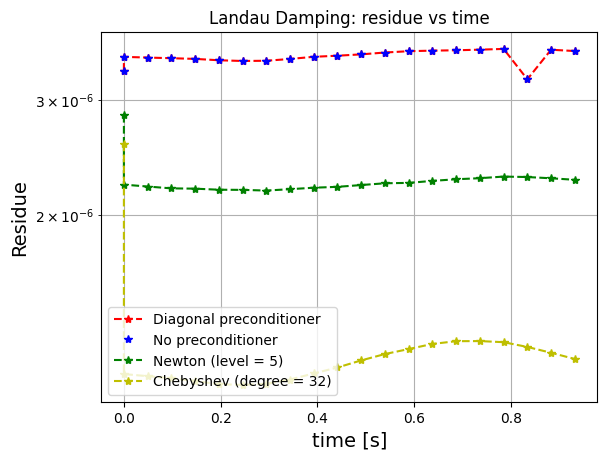

In [44]:
plt.plot(np.array(PCG_iterations_jacobi.get('time')), np.array(PCG_iterations_jacobi.get('residue')), 'r--',marker='*', label='Diagonal preconditioner')
plt.plot(np.array(CG_iterations.get('time')), np.array(CG_iterations.get('residue')), 'b.', marker='*', label='No preconditioner')
plt.plot(np.array(PCG_iterations_newton.get('time')), np.array(PCG_iterations_newton.get('residue')), 'g--',marker='*', label='Newton (level = 5)')
plt.plot(np.array(PCG_iterations_chebyshev.get('time')), np.array(PCG_iterations_chebyshev.get('residue')), 'y--',marker='*', label='Chebyshev (degree = 32)')

plt.title("Landau Damping: residue vs time")
plt.yscale('log')
plt.ylabel("Residue", fontsize=14)
#plt.ylim(300, 500)
plt.xlabel('time [s]', fontsize=14)
plt.grid('True', which='both')
plt.legend()

plt.savefig('Residue vs time.pdf')